## Kosarak

EOF
Execution time:  60.814 seconds.
Top-256 in CMS-8*512
Top_dict with 33104 bytes.
Sketch with 16960 bytes.
Total size 48.890625 bytes, 

For copy
Top-256
Top_dict with 32.328125 kbytes.
Find 1.000 of Heavy Hitters
Execution time:  60.814 seconds.
Find:29
Top_ARE: 0.6027
Top_AAE: 1389.0000
Estimate time:  0.712 seconds.


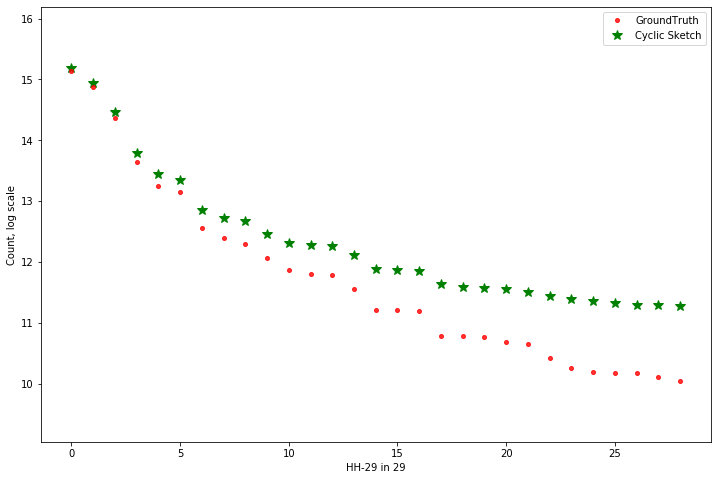

In [3]:
# kosarak
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

dataset='kosarak'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
w=512
d=8
size=256
topk=256
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=10000
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            total_count+=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<TC.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result


print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)


In [ ]:
# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)


# caida for srcip

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 969.236 seconds.
Top-1024 in CMS-8*5500
Top_dict with 138584 bytes.
Sketch with 176576 bytes.
Total size 307.7734375 bytes, 

For copy
Top-1024
Top_dict with 135.3359375 kbytes.
Find 1.000 of Heavy Hitters
Execution time: 969.236 seconds.
Find:710
Top_ARE: 0.1286
Top_AAE: 1278.1901
Estimate time:  0.378 seconds.


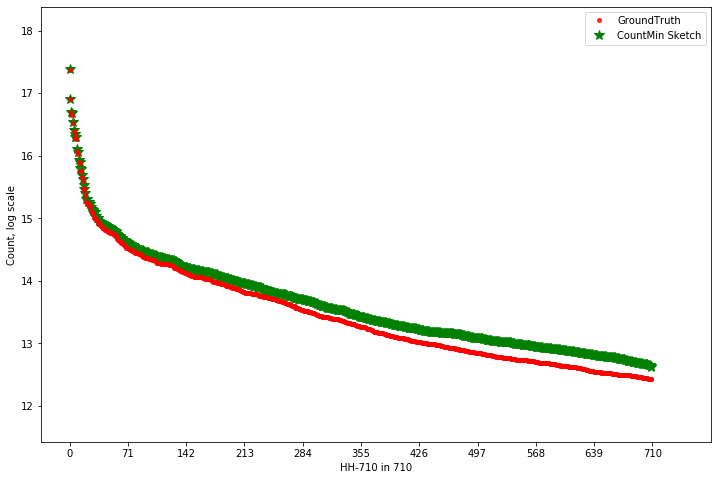

In [6]:
# caida
# track Top-k element all the time
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import sys
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import re

import time
import os
from pympler import asizeof
dataset='caida'
total_count=0
heavy_ratio=1/5000

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
# =============================Initialize=============================
w=5500
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

# =============================Stream processing=============================
#item_count=1000
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                total_count+=1
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================
                item=DS.Tail(e,1)
                cms.Add_CMS(item)
                count=cms.Estimate_CMS(item)
                if len(Top_dict)<TC.size:                
                    if count>total_count*heavy_ratio:
                        Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy")
print("Top-{}".format(TC.size))
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

In [5]:
print(len(HH))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))

1024
Find 0.911 of Heavy Hitters


## webdocs

EOF
Execution time: 925.351 seconds.
Top-256 in CMS-8*768
Top_dict with 31864 bytes.
Sketch with 25152 bytes.
Total size 55.6796875 bytes, 

For copy
Top-256
Total size 55.6796875 bytes, 
Find 100.000% of Heavy Hitters
Execution time: 925.351 seconds.
Find:92
Top_ARE: 0.4070
Top_AAE: 8550.4239
Estimate time:  0.403 seconds.


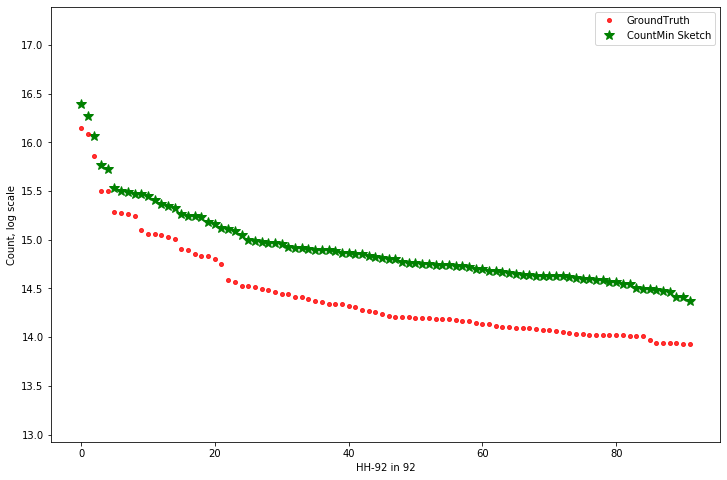

In [8]:
import sys
sys.path.append("..")
from cms.CountMinSketch import CountMinSketch
import sys
import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import re

from pympler import asizeof
import time
import os
dataset='webdocs'
total_count=0
heavy_ratio=1/1000

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

w=768
d=8
size=256
topk=256
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)
Top_dict=dict()

#item_count=10000
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:    
                #item_count-=1
                total_count+=1
                item=DS.Tail(e,1)
                cms.Add_CMS(item)
                count=cms.Estimate_CMS(item)
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=count
                else:
                    if Top_dict.get(item.ID):
                        # e in Top
                        Top_dict[item.ID]=count
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        if count >Top_dict[min_ele]:
                            Top_dict[item.ID]=count
                            Top_dict.pop(min_ele)

end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))
print("Top-{} in CMS-{}*{}".format(TC.topk,TC.depth,TC.width))

# =============================heavy hitter from result=============================
HH=dict()
for item in Top_dict:
    if Top_dict[item]>total_count*heavy_ratio:
        HH[item]=Top_dict[item]
HH=dict(sorted(HH.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(cms)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} bytes, ".format((sk0+sk1)/1024))

# =============================heavy hitter from ground truth=============================
# read ground truth
import pandas as pd
df=pd.read_csv(gr_path)
df['Element']=df['Element'].astype('str')
temp=df[df['Count']>=int(total_count*heavy_ratio)]

gr_set=set(temp['Element'])
result=set(HH.keys())
tp_set=gr_set & result

print("\nFor copy")
print("Top-{}".format(TC.size))
print("Total size {} bytes, ".format((sk0+sk1)/1024))
print("Find {:.3f} of Heavy Hitters".format(len(tp_set)/len(gr_set)))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,HH,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_hh_compare(temp,HH,"CountMin Sketch")

# result to csv
import pandas as pd
path="..\\result\\CM\\"+dataset+"\\HH\\"+str(TC.depth)+"_"+str(TC.width)
# Top_dict to csv
filename='CM_HH_'+str(len(gr_set))+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)